# Deep Learning with Keras and TensorFlow

### Installer les packages

In [ ]:
#!pip install keras

In [ ]:
#!pip install tensorflow

## Utiliser Keras depuis TensorFlow

### Multi Layer Perceptron (MLP) 

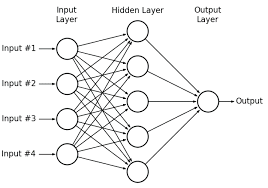

In [37]:
from IPython.display import Image
Image("C:/Users/scorde/Desktop/Data_Science/Projets/Interne/Deep Learning/Images/mlp.png", width=400, height=400)

### Importation des librairies 

In [49]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu, softmax

### Importation des données 

In [104]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

In [105]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


On dispose de 70 000 images labelisées de chiffres (0-9) écrits à la main (base de données MNIST). Chaque image est composée de 784 pixels (28x28). L'intensité d'un pixel varie entre 0 et 255 (échelle de gris).
Notre échantillon d'apprentissage se compose de 60 000 images tandis que notre notre échantillon de test se compose de 10 000 images.

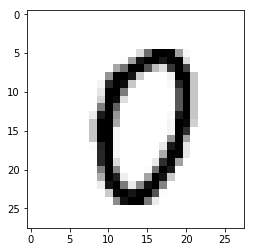

In [106]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1000], cmap=plt.cm.gray_r)
plt.show()

In [60]:
print(x_train.max())
print(x_train.min())
print(x_train.mean())

255
0
33.318421449829934


### Normalisation des images 

In [107]:
x_train = normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = normalize(x_test, axis=1)  # scales data between 0 and 1

In [108]:
print(x_train.max())
print(x_train.min())
print(x_train.mean())

1.0
0.0
0.053848805089292476


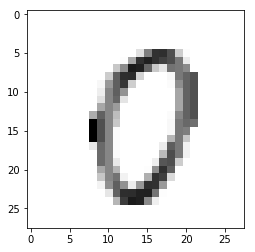

In [109]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1000], cmap=plt.cm.gray_r)
plt.show()

### Machine Learning 

### Multi Layer Perceptron 

In [110]:
model = Sequential()  # a basic feed-forward model
model.add(Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(128, activation=relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(128, activation=relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(10, activation=softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

In [111]:
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how we will calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

In [112]:
model.fit(x_train, y_train)  # train the model

Epoch 1/1
60000/60000 [==============================] - 8s 140us/step - loss: 0.2644 - acc: 0.9232


In [113]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 1s 68us/step
0.14019457593783735
0.9566


In [114]:
predictions = model.predict_classes(x_test)

In [115]:
print(predictions)
print(y_test)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [116]:
from sklearn.metrics import accuracy_score
                                           
accuracy_score(y_test, predictions)

0.9566

In [119]:
np.mean(y_test == predictions)

0.9566

In [120]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[ 965,    0,    0,    1,    1,    0,    9,    1,    2,    1],
       [   0, 1117,    5,    0,    0,    1,    4,    1,    7,    0],
       [   6,    1,  995,   12,    3,    1,    3,    2,    9,    0],
       [   0,    0,   10,  955,    1,   12,    1,    5,   20,    6],
       [   0,    1,   11,    0,  951,    0,    7,    1,    3,    8],
       [   4,    0,    2,   16,    2,  829,   12,    1,   24,    2],
       [   6,    2,    0,    2,    6,    3,  933,    0,    6,    0],
       [   3,    5,   30,    5,    5,    0,    0,  954,    2,   24],
       [   3,    1,    5,   10,    6,    2,    9,    2,  932,    4],
       [   6,    5,    0,   13,   30,    1,    1,    5,   13,  935]],
      dtype=int64)

In [126]:
classes = np.arange(0, 10)

classes = [ str(x) for x in classes]

classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [128]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions), classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions), classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [38, 10000]

<Figure size 432x288 with 0 Axes>

In [ ]:
model.evaluate(x_test, y_test)

## Utiliser Keras avec TensorFlow comme backend 

### Convolutionnal Neural Networks (CNN) 

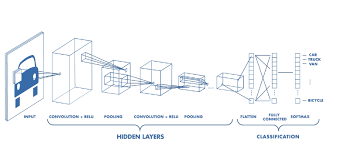

In [82]:
from IPython.display import Image
Image("C:/Users/scorde/Desktop/Data_Science/Projets/Interne/Deep Learning/Images/cnn.png", width=400, height=400)

### Importation des librairies 

In [83]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

### Importation des données 

In [94]:
# Generate dummy data
np.random.seed(42)
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

### Machine Learning 

### Convolutionnal Neural Network (CNN)

In [95]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### Optimisation de la descente de gradient

In [96]:
sgd = SGD(lr=0.01, 
          decay=1e-6,
          momentum=0.9, 
          nesterov=True)

### Compilation du modèle 

In [97]:
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd)

### Apprentissage du modèle 

In [98]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
100/100 [==============================] - 6s 64ms/step - loss: 2.3541
Epoch 2/10
100/100 [==============================] - 5s 50ms/step - loss: 2.3352
Epoch 3/10
100/100 [==============================] - 5s 52ms/step - loss: 2.3019
Epoch 4/10
100/100 [==============================] - 6s 58ms/step - loss: 2.3021
Epoch 5/10
100/100 [==============================] - 5s 52ms/step - loss: 2.2913
Epoch 6/10
100/100 [==============================] - 6s 57ms/step - loss: 2.2931
Epoch 7/10
100/100 [==============================] - 5s 52ms/step - loss: 2.2976
Epoch 8/10
100/100 [==============================] - 5s 50ms/step - loss: 2.2874
Epoch 9/10
100/100 [==============================] - 5s 50ms/step - loss: 2.2896
Epoch 10/10
100/100 [==============================] - 5s 51ms/step - loss: 2.2973


In [99]:
predictions = model.predict_classes(x_test)

In [100]:
predictions

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype=int64)

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=32)

In [129]:
! pwd

C:\Users\scorde
